<a href="https://colab.research.google.com/github/ghubnerr/andrej-karpathy-course/blob/main/makemore_bigram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Character-level Language Model
Modeling sequences of characters to predict the next character in the sequences. Current language models implemented are:
- Bigram
- Bag of Words
- MLP
- RNN
- GRU
- Transformer

In [289]:
words = open("names.txt", 'r').read().splitlines()

# Bigram

In [290]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]): # interesting syntax with iterators
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1


In [291]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('m', '<E>'), 426),
 (('s', '<E>'), 424),
 (('x', '<E>'), 416),
 (('<S>', 'r'), 412),
 (('h', '<E>'), 411),
 (('<S>', 'u'), 411),
 (('u', '<E>'), 408),
 (('<S>', 'y'), 406),
 (('z', '<E>'), 406),
 (('l', '<E>'), 404),
 (('<S>', 'n'), 403),
 (('<S>', 'l'), 398),
 (('<S>', 'a'), 393),
 (('q', '<E>'), 393),
 (('<S>', 'c'), 393),
 (('g', '<E>'), 392),
 (('<S>', 'e'), 392),
 (('v', '<E>'), 392),
 (('<S>', 'q'), 390),
 (('<S>', 'h'), 390),
 (('k', '<E>'), 389),
 (('<S>', 'g'), 389),
 (('n', '<E>'), 389),
 (('<S>', 's'), 388),
 (('c', '<E>'), 388),
 (('<S>', 'd'), 387),
 (('<S>', 'k'), 387),
 (('<S>', 'b'), 386),
 (('d', '<E>'), 386),
 (('<S>', 'z'), 386),
 (('<S>', 'j'), 386),
 (('r', '<E>'), 384),
 (('y', '<E>'), 380),
 (('e', '<E>'), 380),
 (('a', '<E>'), 375),
 (('<S>', 'm'), 374),
 (('<S>', 'f'), 374),
 (('i', '<E>'), 373),
 (('<S>', 'v'), 372),
 (('<S>', 'o'), 372),
 (('b', '<E>'), 369),
 (('<S>', 'w'), 368),
 (('o', '<E>'), 367),
 (('<S>', 'x'), 367),
 (('<S>', 'i'), 365),
 (('j', '<

In [292]:
import torch

In [293]:
N = torch.zeros((27,27), dtype=torch.int32) # 26 + 1 + 1

In [294]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}

In [295]:
stoi['.'] = 0


In [296]:

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]): # interesting syntax with iterators
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1


In [297]:
N

tensor([[  0, 393, 386, 393, 387, 392, 374, 389, 390, 365, 386, 387, 398, 374,
         403, 372, 354, 390, 412, 388, 357, 411, 372, 368, 367, 406, 386],
        [375, 102, 112, 109, 106, 102, 104, 103, 111, 126, 119, 110, 109, 110,
         103, 131, 107, 128, 142, 110, 116, 111, 120, 104, 104, 100, 106],
        [369, 111, 113, 121,  97, 127,  95, 113, 102, 102, 128,  88, 120, 109,
          91, 114,  98, 107, 119, 117, 104, 103, 100, 115, 115, 111,  88],
        [388, 118,  95, 125, 113, 113, 114, 108, 105, 113,  97, 108, 117, 120,
         124, 113, 130, 102, 111, 121, 112, 113, 108, 107, 117, 117, 118],
        [386, 104, 109, 106, 116, 111, 121, 109, 105, 103,  99, 127, 116, 121,
         123, 104, 106, 108,  98, 100, 100, 110,  96, 107, 117, 103, 109],
        [380, 101,  94, 129, 124, 112, 117, 115,  91, 128, 107, 117, 102,  96,
         115, 116, 103, 116, 124, 121, 122,  91, 119, 117, 103,  99, 125],
        [343, 108, 104,  94, 107, 102, 111, 118, 114, 102,  97, 123, 110, 10

In [298]:
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

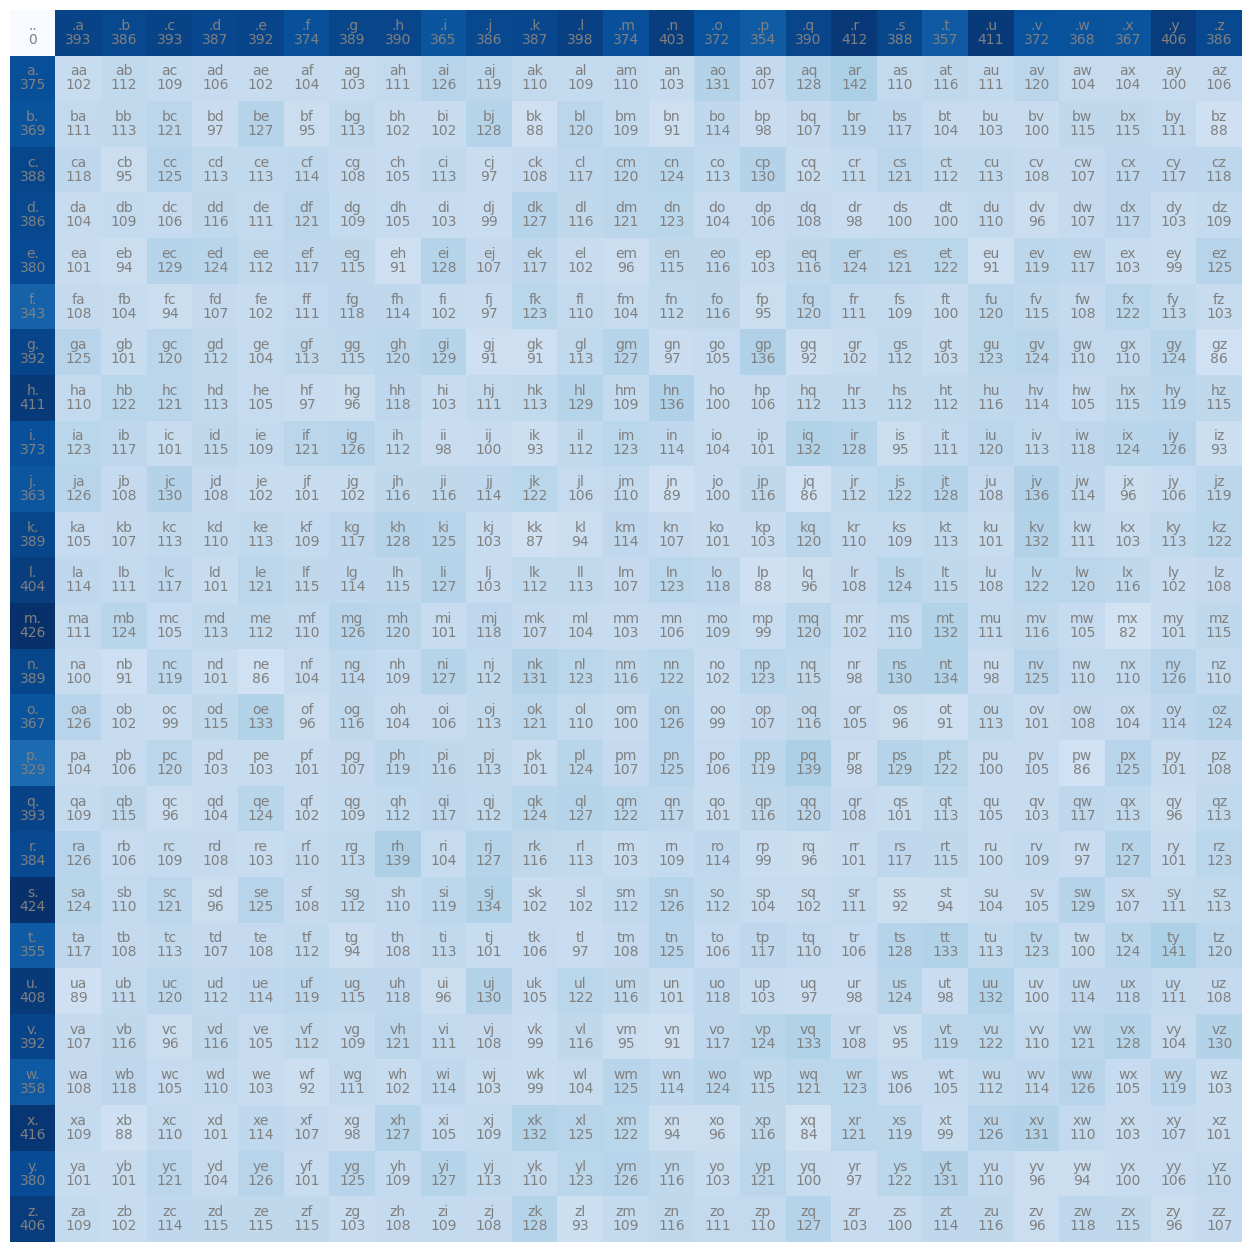

In [299]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap="Blues")
for i in range(27):
  for j in range(27):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
    plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis("off");

In [300]:
p = N[0].float()

In [301]:
p /= p.sum()

In [302]:
g = torch.Generator().manual_seed(2147483647)

In [303]:
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [304]:
P = (N+1).float() # count add to remove 0 counts
P /= P.sum(1, keepdim=True)

# 27, 27
# 27, 1     broadcasting works for element-wise division

In [305]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  ix = 0
  out = []

  while True:
      # p = N[ix].float()
      # p = p / p.sum()
      # p = torch.ones(27) / 27.0
      p = P[ix]
      ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
      out.append(itos[ix])
      if ix == 0:
        break

  print(''.join(out))

juwjdmd.
pkcqaz.
p.
ufqywocnzq.
uiirltozcogs.


In [306]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihodd (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

log_likelihood = 0.0
n = 1

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]): # interesting syntax with iterators
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    # print(f'{ch1}{ch2}, {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = - log_likelihood
print(f'{nll=}')
print(f'{nll/n}') #used in the loss function

log_likelihood=tensor(-307576.5938)
nll=tensor(307576.5938)
3.2355706691741943


### Maximum Likelihood Probability

In [307]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. a
a q
q l
l l
l i
i j
j t
t u
u c
c l
l s
s q
q .


In [308]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes = 27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0

In [309]:
xenc.shape

torch.Size([13, 27])

In [310]:
# Setting the weights to something close to zero is equivalent to making the data uniform

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)


In [311]:

xenc @ W # matrix multiplication in pytorch
# (xenc @ W)[3, 13] -> neuron weight
# (xenc @ W).shape
# (95060, 27) @ (27, 27) = (95060, 27)

logits = (xenc @ W) # log-counts

# equivalent to the N array

# performing a softmax:
counts = logits.exp() # element-wise exponentiate to remove neg nums
probs = counts / counts.sum(1, keepdims = True)


# Pytorch keeps track of all operations under the hood and .backward fills in the gradients

In [312]:
nlls = torch.zeros(13)
for i in range(13):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .a (indexes 0,1)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 1
probability assigned by the net to the the correct character: 0.009982486255466938
log likelihood: -4.6069231033325195
negative log likelihood: 4.6069231033325195
--------
bigram example 2: aq (indexes 1,17)
input to the neural net: 1
output probabilities from the neural net: tensor([0.0150, 0.0086, 0.0396, 0.0100, 0.0606, 0.0308, 0.1084, 0.0131, 0.0125,
        0.0048, 0.1024, 0.0086, 0.0988, 0.0112, 0.0232, 0.0207, 0.0408, 0.0078,
        0.0899, 0.0531, 0.0463, 0.0309, 0.0051, 0.0329, 0.0654, 0.0503, 0.0091])
label (actual next character): 17
probability assigned by the net to the the correct character:

In [313]:
# --- optimization ----

In [314]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [315]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(13), ys].log().mean()

In [316]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [317]:
W.data += -0.1 * W.grad


In [318]:
# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------


In [319]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)


number of examples:  95060


In [320]:
# gradient descent
for k in range(100):

  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())

  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()

  # update
  W.data += -50 * W.grad

3.7591543197631836
3.656442403793335
3.587829828262329
3.53525972366333
3.493072986602783
3.4584004878997803
3.429489850997925
3.405151605606079
3.384521007537842
3.3669395446777344
3.3518869876861572
3.3389437198638916
3.3277640342712402
3.3180623054504395
3.3096017837524414
3.302184581756592
3.2956488132476807
3.2898619174957275
3.28471302986145
3.28011417388916
3.275991678237915
3.2722854614257812
3.26894474029541
3.265929698944092
3.263202667236328
3.2607338428497314
3.258497714996338
3.256469964981079
3.2546322345733643
3.252964496612549
3.2514522075653076
3.2500789165496826
3.2488341331481934
3.2477054595947266
3.2466814517974854
3.2457523345947266
3.244910717010498
3.244147300720215
3.243455410003662
3.2428295612335205
3.242262125015259
3.241748809814453
3.241283893585205
3.24086332321167
3.240483522415161
3.2401397228240967
3.2398293018341064
3.239548683166504
3.23929500579834
3.2390661239624023
3.2388596534729004
3.238672971725464
3.238504648208618
3.2383530139923096
3.2382161

In [321]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix = 0
  while True:

    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

juwjdmd.
pkcqaz.
p.
ufqywocnzq.
uiirltozcogs.
